## Introduction

This tutorial is a step by step guide to create new biomolecular circuit models in Systems Biology Markup Language (SBML). The txtlsim-python toolbox uses the libSBML Python API. 

The methods in the txtlsim-python toolbox to create new SBML models help the user to create models using simple commands rather than the tedious approach when using libSBML classes directly. New users might also find using the methods described below to create new SBML models easier to work with compared to the libSBML API. The SimpleModel and NewReaction classes consist of the most important member functions helpful in creating new models. These are available in the txtlsim-python/BioSIMI-Python/modules/ directory. The object structure of the software design provides for easily using original libSBML methods along with the methods provided in this toolbox.

## Model - Double Phosphorylation

We demonstrate the modeling of a double phosphorylation system. Double phosphorylation is one of the main building blocks of the MAPK cascade, which represents a recurrent structural motif in several signaling pathways. In this model, we assume that an input species, _inP_ , of the double phosphorylation circuit catalyzes phosphorylation of a species _X_ into single-phosphorylated species _X:P_ and phosphorylation of _X:P_ into double-phosphorylated species _X:P:P_. Species are
dephosphorylated by an enzyme _E_.

Note: The different numerical values used in this model are artificial and do not correspond to an actual experiment. 


Import the required libraries by running the following. Press Shift+Enter to run each cell. 

In [1]:
from subsbml import *

### Creating a System to hold the Subsystem with the SBML Model
Create a System to which would act as a compartment to hold the model that we are going to create using the following command. 
Usage - `system_obj = System('system_name') `
The above call returns the System object created with the given system_name as a string. 
Subsequently, we create a new Subsystem called 'DP' inside the System created. The createNewSubsystem is a member function of System class which creates an empty SBMLDocument of given level and version as arguments in the createNewSubsystem call. Usage - `subsystem_object = system_object.createNewSubsystem(level, version)`

Next, we create a SBML model for the Subsystem object created. To create a new model, the member function of Subsystem class can be used as `self.createNewModel(model_id, model_time_units, model_extent_units, model_substance_units)`. This function call returns a libSBML Model object, which can be used to create a SimpleModel class object or may be used for calls to libSBML Model class member functions. 

As mentioned earlier, an important feature of the txtlsim-python toolbox is that its customizabile with libSBML member functions. Most function calls and methods in the different classes defined in the toolbox, return objects of the libSBML Python API so that all the methods defined for libSBML can be easily used for any functionality that is not already provided by txtlsim-python.

For a description of the Model class and the public member functions available to be used with the Model class, you may visit the [libSBML.Model Class Reference](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_model.html). 

The most commonly used features and important methods are already covered in the txtlsim-python toolbox's Classes (as described later in this notebook), so you would not have to write tedious code using libSBML member functions. However, if there's some feature which is not covered here or does not work as desired, the txtlsim-python classes' member functions return libSBML objects and hence they may be used for such features. 

In [2]:
# Create a System to hold the Subsystems
cell = System('cell')

# Create a new SBML Document to hold the subsystem model
DP = cell.createNewSubsystem()
# Create a new model inside the document
model = DP.createNewModel('DP','second','mole','count')
# Creating the model object to use simple model creation commands that follow
simpleModel = SimpleModel(model)

# simpleModel.getModel() returns the libSBML model object and then all methods applicable
# for Model libsbml class can be used. Usage example - 
# model = simpleModel.getModel()
# model.setLengthUnits('count')


simpleModel.getModel().toSBML()

'<model id="DP" substanceUnits="count" timeUnits="second" extentUnits="mole"/>'

### Creating Units, Compartments, and Species in the Model
Using the SimpleModel class object created above, we can use the methods in the SimpleModel class to populate the model with one line commands to create new components. The following code creates two new unit definitions, one new compartment, and 9 new species. The usage for each call is given as a comment above the particular kind of call. The resulting populated model in the SBML format should be printed on running the following cell.

As mentioned before, the member functions of SimpleModel return libSBML objects, so they may be called to get a pointer to the objects if there is a need to use them for other features of libSBML member function calls. Since, they are not needed in this example, they are skipped for most calls. Each `self.createNew` call, creates the corresponding new component and returns a pointer to the libSBML object created. 

All calls to the SimpleModel member functions return libSBML objects described below.

To facilitate easier modeling, the createNewSpecies and createNewParameter methods accept list arguments as well. Adding single species and adding multiple species in a list are both demonstrated in the following code. 

For more information and for a list of other available public member functions provided by libSBML Python API, visit the following links - 
* [UnitDefinition](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_unit_definition.html)
* [Compartment](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_compartment.html)
* [Species](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_species.html)

In [3]:
# Create a unit, arguments - id, unitKind, exponent, scale, multiplier
# Returns a pointer to the UnitDefinition object created
per_second = simpleModel.createNewUnitDefinition('per_second',libsbml.UNIT_KIND_SECOND,-1,0,1)
count = simpleModel.createNewUnitDefinition('count',libsbml.UNIT_KIND_DIMENSIONLESS, 1, 0, 1)

# The returned objects are not used hence, in the following calls, they will be skipped and no variable will be 
# assigned to the returned objects


# createNewcompartment arguments - compartment ID, Name, Size, Units, isConstant
# Returns a Compartment object
simpleModel.createNewCompartment('cell','cell',1,'litre',True)

# self.createNewSpecies(name, compartment,
#  initial amount, isConstant, Substance units, BoundaryCondition = False HasOnlySubstance = False)
# Returns a pointer to the Species object created


simpleModel.createNewSpecies( 'inP','cell',50,False,'count',True, False)
simpleModel.createNewSpecies( 'X','cell',50,False,'count')

# Multiple species can be created when given as a list, the initial amounts should be given corresponding to each species accordingly

simpleModel.createNewSpecies(['inP:X','X:P','E','E:X:P','inP:X:P', 'X:P:P', 'E:X:P:P'],
 'cell',[0,0,50,0,0,0,0], False, 'count')

# Print the SBML string created
print(simpleModel.getModel().toSBML())

<model id="DP" substanceUnits="count" timeUnits="second" extentUnits="mole">
  <listOfUnitDefinitions>
    <unitDefinition id="per_second">
      <listOfUnits>
        <unit kind="second" exponent="-1" scale="0" multiplier="1"/>
      </listOfUnits>
    </unitDefinition>
    <unitDefinition id="count">
      <listOfUnits>
        <unit kind="dimensionless" exponent="1" scale="0" multiplier="1"/>
      </listOfUnits>
    </unitDefinition>
  </listOfUnitDefinitions>
  <listOfCompartments>
    <compartment id="cell" name="cell" spatialDimensions="3" size="1" units="litre" constant="true"/>
  </listOfCompartments>
  <listOfSpecies>
    <species id="inP" name="inP" compartment="cell" initialConcentration="50" substanceUnits="count" hasOnlySubstanceUnits="false" boundaryCondition="true" constant="false"/>
    <species id="X" name="X" compartment="cell" initialConcentration="50" substanceUnits="count" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
    <species id="

### Creating all global parameters
We will now create new parameters and reactions to add to the model. The comments above the function calls describe their attributes.

To create reactions, the `self.createNewReaction(...)` method of the SimpleModel class is used. It returns a libSBML Reaction object. Using the libSBML Reaction object, a NewReaction object is created to enable the usage of NewReaction class methods which allow the usage of simple commands to create reactants, products and the reaction rate. 

All calls to the methods in NewReaction and SimpleModel class return libSBML objects described below. 

As mentioned above, the createNewParameter also accepts list arguments to faciliate easier modeling of parameters in SBML without writing repetitive code. This is demonstrated in the following code. 

For more information and for a list of other public member functions provided by libSBML Python API visit the following links - 
* [Parameter](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_parameter.html)


In [4]:
# Create all parameters 
# arguments - name, value, isConstant, Unit id
# Returns a pointer to the Parameter object created 
simpleModel.createNewParameter( 'k1f',1,False,'per_second')
simpleModel.createNewParameter( 'k1r',1,False,'per_second')

# Creating multiple parameters by giving all of them together in a list and giving the corresponding values in a list of same size
simpleModel.createNewParameter( ['k2f','k3f','k3r','k4f','k5f','k5r','k6f','k7f','k7r','k8f'],
[1,1,1,1,1,1,1,1,1,1],False,'per_second')

print(simpleModel.getModel().toSBML())

<model id="DP" substanceUnits="count" timeUnits="second" extentUnits="mole">
  <listOfUnitDefinitions>
    <unitDefinition id="per_second">
      <listOfUnits>
        <unit kind="second" exponent="-1" scale="0" multiplier="1"/>
      </listOfUnits>
    </unitDefinition>
    <unitDefinition id="count">
      <listOfUnits>
        <unit kind="dimensionless" exponent="1" scale="0" multiplier="1"/>
      </listOfUnits>
    </unitDefinition>
  </listOfUnitDefinitions>
  <listOfCompartments>
    <compartment id="cell" name="cell" spatialDimensions="3" size="1" units="litre" constant="true"/>
  </listOfCompartments>
  <listOfSpecies>
    <species id="inP" name="inP" compartment="cell" initialConcentration="50" substanceUnits="count" hasOnlySubstanceUnits="false" boundaryCondition="true" constant="false"/>
    <species id="X" name="X" compartment="cell" initialConcentration="50" substanceUnits="count" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
    <species id="

### Creating all reactions 

To model reactions, the createNewReaction method accepts reaction strings directly. A reaction string uses `-->` to represent the arrow of an irreversible reaction and a `<->` to represent the arrow of a reversible reaction. (Note that both arrows are of the same length and effectively the first hyphen '-' is replaced by a '<' to get the arrow for reversible reaction).  
Depending on the arrow used, the reaction's reversible attribute is set. 

Examples - 

* A irreversible reaction string `RNAP + SIGX --> RNAP:SIGX`.
* A reversible reaction string `3 RNAP + 2SIGX <-> Y`.

Note that stoichiometries are picked up from the reaction string too. The whitespaces do not matter and a '+' should be used to separate reactants. All species in the reaction string should use the names of the species as created before. Ensure that there multiple species of the same name do not exist in the model.

The createNewReaction method accepts a rate formula as a string directly which creates the reaction kinetic law. The rate formmula should use the identifiers for the species and parameters that it refers. This is important to consider because while creating parameters and species, only names were given and the ids were generated according to the names. In the usual case, the id generated will be the same as the name given for the species or the parameters. However, special characters which are not allowed in SBML identifier naming are replaced. For example, ':' is replaced by a '\_'. So, constructing ids from the names shouldn't be hard and the ids should be used in rate strings.

Finally, the usage of the createNewReaction is described as follows. For a simpleModel object, use - 
`self.createNewReaction(reaction_id, reaction_string, reaction_rate_string, reaction_isConstant_bool = False)`

The isConstant attribute is to denote whether the species involved in the reaction are constant or not. The default value is False. 

A Reaction libsbml object is returned.

#### Alternative (longer) method to create reactions 
An alternate way to create the reactions is available which provides access to all the individual components of a reaction. This may be helpful when creating reactions with peculiar properties. A new reaction is created in the libsbml Model object and a SimpleReaction class object is created so that it can be used to create the reactants, products, rate etc. 

Usage - 

* Create a Reaction. `r = model.createReaction()`
* Create a SimpleReaction object of r. `r_obj = SimpleReaction(r)`
* Set the id of the reaction. `r.setId(id_string)`
* Set the reversible attribute of the reaction (mandatory in SBML). `r.setReversible(bool)`.
* Use methods of the SimpleReaction class to create the reactants, products and rate of the reaction. `r_obj.createNewReactant(species_id, isConstant, stoichiometry)`. Similarly, `r_obj.createNewProduct(species_id, isConstant, stoichiometry)`. Finally, create the rate for the reaction using a formula string which uses the species and parameter ids. `ast_node = r_obj.createMath(formulaString)`, set the ast_node to the reaction rate. `r_obj.createRate(ast_node)`


For more information and for a list of other public member functions provided by libSBML Python API visit the following links -
* [Reaction](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_reaction.html)
* [SpeciesReference](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_species_reference.html)
* [KineticLaw](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_kinetic_law.html)
* [ASTNode](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_a_s_t_node.html) 
Used to create math formula. From the formula strings provided, an AST node is created which is used to create the MathML content in the SBML Model

In [9]:
# Example of the first (easier) method to create reactions - 

simpleModel.createSimpleReaction('r1','inP + X <-> inP:X','k1f * inP * X - k1r * inP_X', False)

# Example of the second (longer) method to create reactions - 

r2 = SimpleReaction(model.createReaction())
r2.getReaction().setId('r2')
r2.getReaction().setReversible(False)
r2.createNewReactant('inP_X',False,1)
r2.createNewProduct('inP',False,1)
r2.createNewProduct('X_P',False,1)
math_r2 = r2.createMath('k2f * inP_X')
r2.createRate(math_r2)


# Creating all other reactions using the first method

simpleModel.createSimpleReaction('r3','E + X:P <-> E:X:P','k3f * E * X_P - k3r * E_X_P')

simpleModel.createSimpleReaction('r4','E:X:P --> E + X','k4f * E_X_P')

simpleModel.createSimpleReaction('r5','inP + X:P <-> inP:X:P', 'k5f * inP * X_P - k5r * inP_X_P')

simpleModel.createSimpleReaction('r6','inP:X:P --> X:P:P + inP', 'k6f * inP_X_P')

simpleModel.createSimpleReaction('r7','E + X:P:P <-> E:X:P:P', 'k7f * E * X_P_P - k7r * E_X_P_P')

simpleModel.createSimpleReaction('r8','E:X:P:P --> X:P + E', 'k8f * E_X_P_P')

print(simpleModel.getModel().toSBML())

<model id="DP" substanceUnits="count" timeUnits="second" extentUnits="mole">
  <listOfUnitDefinitions>
    <unitDefinition id="per_second">
      <listOfUnits>
        <unit kind="second" exponent="-1" scale="0" multiplier="1"/>
      </listOfUnits>
    </unitDefinition>
    <unitDefinition id="count">
      <listOfUnits>
        <unit kind="dimensionless" exponent="1" scale="0" multiplier="1"/>
      </listOfUnits>
    </unitDefinition>
  </listOfUnitDefinitions>
  <listOfCompartments>
    <compartment id="cell" name="cell" size="1" units="litre" constant="true"/>
  </listOfCompartments>
  <listOfSpecies>
    <species id="inP" name="inP" compartment="cell" initialAmount="50" substanceUnits="count" hasOnlySubstanceUnits="false" boundaryCondition="true" constant="false"/>
    <species id="X" name="X" compartment="cell" initialAmount="50" substanceUnits="count" hasOnlySubstanceUnits="false" boundaryCondition="false" constant="false"/>
    <species id="inP_X" name="inP:X" compartment="cel

### Output to SBML file and simulation using bioscrape
Now, that the basic model is created, we can write the model to an XML file. The following code will write the DP Subsystem to an XML file. Give any desired filename in the following command and verify that the model is written to the file which should be stored inside the model folder in the current directory. 

Using [bioscrape](https://github.com/ananswam/bioscrape), SBML models can be simulated. The plotSbmlWithBioscrape utility function is defined in the utilityFunctions.py file inside the modules folder. Usage - 
`plotSbmlWithBioscrape(ListOfSBMLFilenamesToPlot, initialTime, timepoints, ListOfSpeciesToPlot,compartmentSpeciesToPlot, XLabel, YLabel, linewidth, XAxisSize, YAxisSize)`
Note - ListOfSpeciesToPlot should be a ListOfLists type when multiple files have been given in the ListOfSBMLFilenamesToPlot, each item of the ListOfLists should correspond to the given filename in order.

Note - To read an SBML file, following can be used - 
```
reader = SBMLReader()
SBMLDocument_object = reader.readSBML(filename)
model = SBMLDocument_object.getModel()
```

To write a SBMLDocument, to SBML - 

```
writeSBML(SBMLDocument, filename)
```

To write a SBML Model to SBML, the SBMLDocument object can be retreived and then written to SBML file
```
SBMLDocument_object = model.getDocument()
writeSBML(SBMLDocument_object, filename)
```

To write a Subsystem object, the SBMLDocument object can be retreived using `self.getSubsystemDoc()` method of the Subsystem class, as used below.

For more details on [SBMLDocument](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_s_b_m_l_document.html) refer to its documentation.

c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\subsbml-0.1-py3.6.egg\subsbml\Subsystem.py:2110: UserWarning: Warning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations. This warning will always appear if you are using SBML 1 or 2
  m = bioscrape.types.read_model_from_sbml(filename)


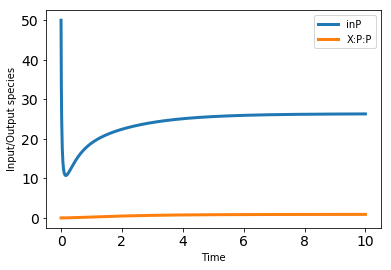

In [11]:
# Write to XML file 
libsbml.writeSBML(DP.getSBMLDocument(),'models/DP.xml')

# Simulate and plot using bioscrape
timepoints = np.linspace(0, 10, 1000)
plotSbmlWithBioscrape('models/DP.xml',0,timepoints,['inP','X:P:P'],'','Time','Input/Output species',3,14,14)

### Other member functions available 
There are many other optional components that can be added to the model. For example, events, constraints, rules etc. For events, the Delay and Priority attributes are provided as optional arguments. All of the methods described below return their respective libSBML class objects when they are called. 

SimpleModel member functions provide the option to create these components in a model, similar to the commands described above. 
The following code snippet describes these methods. At the end, the model is written to a new filename whose output can be checked to ensure that it works as desired. The new file may be plotted with bioscrape as described above. 

On running the following code, the new SBML model should be simulated using bioscrape and a plot will be displayed. 

For more details on how to add these different components to a model, to understand their use, and to use other public member functions provided by libSBML, refer to the following.
* [Constraint](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_constraint.html)
* [InitialAssignment](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_initial_assignment.html)
* [AssignmentRule](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_assignment_rule.html)
* [AlgebraicRule](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_algebraic_rule.html)
* [RateRule](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_rate_rule.html)
* [Event](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_event.html)
* [Trigger](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_trigger.html)
* [Delay](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_delay.html)
* [EventAssignment](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_event_assignment.html)
* [FunctionDefinition](http://sbml.org/Software/libSBML/5.13.0/docs/python-api/classlibsbml_1_1_function_definition.html)

c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\subsbml-0.1-py3.6.egg\subsbml\Subsystem.py:2110: UserWarning: Warning: SBML model contains reversible reaction!
Please check rate expressions and ensure they are non-negative before doing stochastic simulations. This warning will always appear if you are using SBML 1 or 2
  m = bioscrape.types.read_model_from_sbml(filename)
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\subsbml-0.1-py3.6.egg\subsbml\Subsystem.py:2110: UserWarning: Unsupported rule type: rateRule
  m = bioscrape.types.read_model_from_sbml(filename)
c:\users\apand\appdata\local\programs\python\python36\lib\site-packages\subsbml-0.1-py3.6.egg\subsbml\Subsystem.py:2110: UserWarning: Warning! Useless parameter k7f
  m = bioscrape.types.read_model_from_sbml(filename)


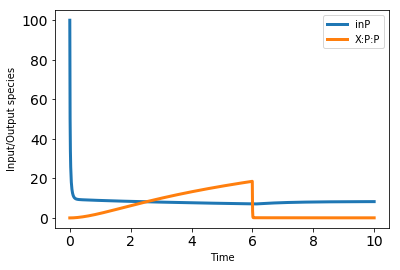

In [13]:
# Creating a new Subsystem to have a new model with these optional components

DP_ext = cell.createNewSubsystem()
DP_ext.getSBMLDocument().setModel(simpleModel.getModel())
simpleModel_ext = SimpleModel(DP_ext.getSBMLDocument().getModel())

# Create a new Constraint 
# Usage - self.createNewConstraint(constraint_mathFormula, constraintName)
constraint = simpleModel_ext.createNewConstraint('k1f>0', 'constraint_name')

# Create new InitialAssignment
# Usage - self.createNewInitialAssignment(initialAssignment_variable, initialAssignment_mathFormula)
simpleModel_ext.createNewInitialAssignment('k2f','2*k1f')

# For Rules, ensure that the consistency according to SBML specifications is maintained
# For documentation, refer to links below.

# Create new AssignmentRule
# Usage - self.createNewAssignmentRule(assignmentRule_variable, assignmentRule_mathFormula)
simpleModel_ext.createNewAssignmentRule('inP','2*X')

# Create new AssignmentRule
# Usage - self.createNewRateRule(rateRule_variable, rateRule_mathFormula)
simpleModel_ext.createNewRateRule('k3f','2')

# Similarly, 
# self.createNewAlgebraicRule(algebraicRule_variable, algebraicRule_mathFormula)
# self.createNewFunctionDefinition(id, functionDefinition_mathFormula, functionDefinition_name = '')

# Create new Event
# Usage - self.createNewEvent(id, eventTrigger_isPersistent, eventTrigger_initialValue, 
# eventTrigger_mathFormula, eventAssignment_variable, eventAssignment_mathFormula, 
# delayFormula = '', priorityFormula = '', useValuesFromTriggerTime = True, name = '')
simpleModel_ext.createNewEvent('ev1',True, True,'k6f<0','k7f','10')

# Write to XML file 
libsbml.writeSBML(DP_ext.getSBMLDocument(),'models/DP_extended.xml')

# Simulate and plot using bioscrape
timepoints = np.linspace(0, 10, 1000)
plotSbmlWithBioscrape('models/DP_extended.xml',0,timepoints,['inP','X:P:P'],'','Time','Input/Output species',3,14,14)